## 4. STT 변환

1. 모델 로드 : Whisper 모델 (openai/whisper-small)을 로드
2. 음성 인식 실행 : .wav 파일을 입력하면 해당 파일의 음성을 한국어 텍스트로 변환
3. 출력 : 변환된 텍스트를 반환하고, 터미널에 출력

In [3]:
# Huggin Face의 transformers 라이브러리 설치
#!pip install transformers

In [25]:
import os
from pydub import AudioSegment
from transformers import pipeline

# 🤖 Whisper STT 파이프라인 생성
asr_pipe = pipeline("automatic-speech-recognition", model="openai/whisper-small")

def transcribe_long_audio(path, chunk_duration=30):
    print(f"🎧 오디오 파일 로딩 중: {path}")
    audio = AudioSegment.from_wav(path)

    chunks = []
    total_chunks = len(audio) // (chunk_duration * 1000) + 1
    print(f"🔄 총 분할 개수: {total_chunks}개 (약 {chunk_duration}초씩)")

    for idx, i in enumerate(range(0, len(audio), chunk_duration * 1000), start=1):
        chunk = audio[i:i + chunk_duration * 1000]
        chunk_path = f"temp_chunk_{i}.wav"

        print(f"\n⏳ [{idx}/{total_chunks}] Chunk 변환 중... ({chunk_duration}초)")
        chunk.export(chunk_path, format="wav")

        try:
            result = asr_pipe(chunk_path)
            text = result.get("text", "")
            chunks.append(text.strip())
            print(f"✅ 변환 완료: \"{text.strip()}\"")
        except Exception as e:
            print(f"❌ 변환 실패: {e}")
            chunks.append("")

        os.remove(chunk_path)

    full_text = " ".join(chunks)
    print("\n📝 전체 추출 텍스트 완료!")
    print("-" * 60)
    print(full_text)
    print("-" * 60)
    return full_text

Device set to use cpu


In [27]:
transcribe_long_audio("D:/2025_work/2025_VoicePhshing_Detection_Model/dataset/processed_wav/normal_normal_1.wav")

🎧 오디오 파일 로딩 중: D:/2025_work/2025_VoicePhshing_Detection_Model/dataset/processed_wav/normal_normal_1.wav
🔄 총 분할 개수: 5개 (약 30초씩)

⏳ [1/5] Chunk 변환 중... (30초)
✅ 변환 완료: "스마트폰 어플로 대출원금 상완돼요? 네, 고객님 어플로 가능한 서비스입니다. 상완방법이나 상완기관 변경도 어플로 되는 거죠? 원리금 상완방법 및 상완기관 변경은 영업점에서 이용 가능한 서비스입니다. 어플은 24시간 이용되겠죠? 어플 일지라도 평일 24시간으로 운영을 합니다."

⏳ [2/5] Chunk 변환 중... (30초)
✅ 변환 완료: "국민주택기금원금 상황도 24시죠."

⏳ [3/5] Chunk 변환 중... (30초)
✅ 변환 완료: "기간 연락처 알 수 있나요? 기간 홈페이지의 연락처를 참고해 주셔야 합니다. 대출 신청도 어플로 되는 거죠? 물론입니다. 고객님. 달 신용 등급 등 본인 확인 설차를 거쳐야 하기 때문에 영업점 방문을 제일 추천드리는 바입니다. 수시로 대출을 한 게 있는데 이것도 어플에서 상완되는 거죠."

⏳ [4/5] Chunk 변환 중... (30초)
✅ 변환 완료: "수시로 대출과 학자금 대출은 어플에서 이용 가능한 서비스가 아닙으로 죄송합니다만 안됩니다. 대출 상품에 따라 다른 거네요? 네 고객님. 국민주택 기금 대출은 가능하나 수시로 대출은 어플로 이용할 수 없습니다. 아 알겠습니다. 어쨌든 영업점 한번은 가야 하네요."

⏳ [5/5] Chunk 변환 중... (30초)
✅ 변환 완료: "영업점 방문하셔서 보다 빠르고 편한 서비스 이용해 주십시오 상담원 0000 이었습니다"

📝 전체 추출 텍스트 완료!
------------------------------------------------------------
스마트폰 어플로 대출원금 상완돼요? 네, 고객님 어플로 가능한 서비스입니다. 상완방법이나 상완기관 변경도 어플로 되는 거

'스마트폰 어플로 대출원금 상완돼요? 네, 고객님 어플로 가능한 서비스입니다. 상완방법이나 상완기관 변경도 어플로 되는 거죠? 원리금 상완방법 및 상완기관 변경은 영업점에서 이용 가능한 서비스입니다. 어플은 24시간 이용되겠죠? 어플 일지라도 평일 24시간으로 운영을 합니다. 국민주택기금원금 상황도 24시죠. 기간 연락처 알 수 있나요? 기간 홈페이지의 연락처를 참고해 주셔야 합니다. 대출 신청도 어플로 되는 거죠? 물론입니다. 고객님. 달 신용 등급 등 본인 확인 설차를 거쳐야 하기 때문에 영업점 방문을 제일 추천드리는 바입니다. 수시로 대출을 한 게 있는데 이것도 어플에서 상완되는 거죠. 수시로 대출과 학자금 대출은 어플에서 이용 가능한 서비스가 아닙으로 죄송합니다만 안됩니다. 대출 상품에 따라 다른 거네요? 네 고객님. 국민주택 기금 대출은 가능하나 수시로 대출은 어플로 이용할 수 없습니다. 아 알겠습니다. 어쨌든 영업점 한번은 가야 하네요. 영업점 방문하셔서 보다 빠르고 편한 서비스 이용해 주십시오 상담원 0000 이었습니다'

### processed_wav 의 STT 변환
- normal 100개 랜덤으로 추출하여 변환
- phishing 100개 랜덤으로 추출하여 변환

In [35]:
import csv
import random
from pathlib import Path

# 📁 디렉토리 및 출력 경로 설정
wav_dir = Path("D:/2025_work/2025_VoicePhshing_Detection_Model/dataset/processed_wav")
output_csv = Path("D:/2025_work/2025_VoicePhshing_Detection_Model/dataset/stt_transcripts_sampled.csv")

# 전체 파일 목록에서 라벨별로 분류
normal_files = [f for f in wav_dir.glob("*.wav") if "normal" in f.name.lower()]
phishing_files = [f for f in wav_dir.glob("*.wav") if "phishing" in f.name.lower()]

# 🔀 랜덤으로 100개씩 샘플링
normal_sampled = random.sample(normal_files, min(100, len(normal_files)))
phishing_sampled = random.sample(phishing_files, min(100, len(phishing_files)))

# 📄 샘플링된 파일명 출력
print("\n🟩 샘플링된 Normal 파일 (100개):")
for f in normal_sampled:
    print(f.name)

print("\n🟥 샘플링된 Phishing 파일 (100개):")
for f in phishing_sampled:
    print(f.name)

# 🎧 STT 처리할 전체 목록
all_sampled_files = [(f, 0) for f in normal_sampled] + [(f, 1) for f in phishing_sampled]

# 📝 STT 결과 CSV로 저장
with open(output_csv, mode="w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["filename", "label", "text"])

    for wav_file, label in all_sampled_files:
        print(f"🎧 STT 처리 중: {wav_file.name} (label={label})")
        try:
            text = transcribe_long_audio(str(wav_file))
            writer.writerow([wav_file.name, label, text])
        except Exception as e:
            print(f"❌ 오류 발생 ({wav_file.name}): {e}")

print(f"\n✅ STT 처리 및 저장 완료: {len(all_sampled_files)}개 파일 → {output_csv}")



🟩 샘플링된 Normal 파일 (100개):
normal_normal_607.wav
normal_normal_543.wav
normal_normal_370.wav
normal_normal_92.wav
normal_normal_399.wav
normal_normal_99.wav
normal_normal_299.wav
normal_normal_91.wav
normal_normal_11.wav
normal_normal_398.wav
normal_normal_5.wav
normal_normal_377.wav
normal_normal_159.wav
normal_normal_77.wav
normal_normal_524.wav
normal_normal_566.wav
normal_normal_600.wav
normal_normal_376.wav
normal_normal_577.wav
normal_normal_371.wav
normal_normal_127.wav
normal_normal_408.wav
normal_normal_583.wav
normal_normal_608.wav
normal_normal_559.wav
normal_normal_601.wav
normal_normal_573.wav
normal_normal_330.wav
normal_normal_369.wav
normal_normal_96.wav
normal_normal_361.wav
normal_normal_496.wav
normal_normal_18.wav
normal_normal_368.wav
normal_normal_73.wav
normal_normal_19.wav
normal_normal_358.wav
normal_normal_307.wav
normal_normal_443.wav
normal_normal_272.wav
normal_normal_82.wav
normal_normal_10.wav
normal_normal_545.wav
normal_normal_226.wav
normal_normal_435.w

## ✅ stt_utils.py – STT 변환 함수 정의

In [2]:
# stt_utils.py
import os
from pydub import AudioSegment
from transformers import pipeline

# 🤖 Whisper STT 파이프라인 생성 (모듈 로딩 시 1회만)
asr_pipe = pipeline("automatic-speech-recognition", model="openai/whisper-small")

def transcribe_long_audio(audio_path, chunk_duration=30):
    """
    긴 오디오 파일을 Whisper로 STT 처리하는 함수
    :param audio_path: 오디오 파일 경로 (예: "sample.wav")
    :param chunk_duration: 분할 단위 (초)
    :return: 전체 변환된 텍스트 (str)
    """
    print(f"🎧 오디오 파일 로딩 중: {audio_path}")
    audio = AudioSegment.from_wav(audio_path)

    chunks = []
    total_chunks = len(audio) // (chunk_duration * 1000) + 1
    print(f"🔄 총 분할 개수: {total_chunks}개 (약 {chunk_duration}초씩)")

    for idx, i in enumerate(range(0, len(audio), chunk_duration * 1000), start=1):
        chunk = audio[i:i + chunk_duration * 1000]
        chunk_path = f"temp_chunk_{i}.wav"

        print(f"\n⏳ [{idx}/{total_chunks}] Chunk 변환 중... ({chunk_duration}초)")
        chunk.export(chunk_path, format="wav")

        try:
            result = asr_pipe(chunk_path)
            text = result.get("text", "")
            chunks.append(text.strip())
            print(f"✅ 변환 완료: \"{text.strip()}\"")
        except Exception as e:
            print(f"❌ 변환 실패: {e}")
            chunks.append("")

        os.remove(chunk_path)

    full_text = " ".join(chunks)
    print("\n📝 전체 추출 텍스트 완료!")
    print("-" * 60)
    print(full_text)
    print("-" * 60)
    return full_text

C:\downloads\anaconda3\envs\whisper_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Device set to use cpu


## ✅ run_stt_batch.py – STT 변환 실행 스크립트

In [ ]:
# run_stt_batch.py
import csv
import random
from pathlib import Path
from stt_utils import transcribe_long_audio

# 📁 디렉토리 및 출력 경로 설정
wav_dir = Path("D:/2025_work/2025_VoicePhshing_Detection_Model/dataset/processed_wav")
output_csv = Path("D:/2025_work/2025_VoicePhshing_Detection_Model/dataset/stt_transcripts_sampled.csv")

# 전체 파일 목록에서 라벨별로 분류
normal_files = [f for f in wav_dir.glob("*.wav") if "normal" in f.name.lower()]
phishing_files = [f for f in wav_dir.glob("*.wav") if "phishing" in f.name.lower()]

# 🔀 랜덤으로 100개씩 샘플링
normal_sampled = random.sample(normal_files, min(100, len(normal_files)))
phishing_sampled = random.sample(phishing_files, min(100, len(phishing_files)))

# 🎧 STT 처리할 전체 목록
all_sampled_files = [(f, 0) for f in normal_sampled] + [(f, 1) for f in phishing_sampled]

# 📝 STT 결과 CSV로 저장
with open(output_csv, mode="w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["filename", "label", "text"])

    for wav_file, label in all_sampled_files:
        print(f"🎧 STT 처리 중: {wav_file.name} (label={label})")
        try:
            text = transcribe_long_audio(str(wav_file))
            writer.writerow([wav_file.name, label, text])
        except Exception as e:
            print(f"❌ 오류 발생 ({wav_file.name}): {e}")

print(f"\n✅ STT 처리 및 저장 완료: {len(all_sampled_files)}개 파일 → {output_csv}")

###  Whisper 모델은 HuggingFace 파이프라인(pipeline)으로 로드한 것이기 때문에, torch.save()로 직접 저장할 수 없음.
- stt_utils.py: STT 기능만 깔끔하게 모듈화

- run_stt_batch.py: 샘플링, CSV 저장 등 실행 전용 코드
------------------------------
이렇게 분리하면:

- 다른 파일에서 from stt_utils import transcribe_long_audio 한 줄로 함수 재사용 가능

- 프로젝트 구조가 깔끔해지고 유지보수 쉬움



### 📁 stt_utils.py 사용 방법
✅ stt_utils.py
- STT 함수 (transcribe_long_audio)를 정의해 놓은 파일이에요.

- 일종의 "도구 상자(utility module)" 같은 역할.

- 이 안에 Whisper 모델 로딩과 STT 처리 기능이 들어 있음.

✅ run_stt_batch.py
- 실제로 여러 .wav 파일을 STT 처리하고, 결과를 CSV로 저장하는 **실행 파일(스크립트)**입니다.

- 이 파일에서 stt_utils.py에 정의된 STT 함수를 불러와서 사용하는 거예요.

In [ ]:
from stt_utils import transcribe_long_audio

# 🔄 사용자 지정 오디오 파일 입력
audio_path = "D:/my_audio_files/sample_001.wav"
text = transcribe_long_audio(audio_path)

# 👉 결과 출력 or 저장
print("변환된 텍스트:", text)

### 📌 관계도 요약
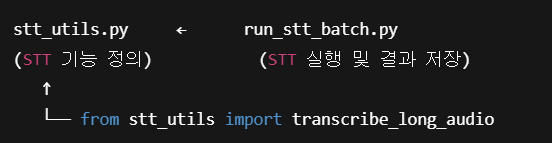